<a href="https://colab.research.google.com/github/Tommy840602/CatBoost/blob/main/catboost_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import plotly.express as px

In [49]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [52]:
df.rename(columns={'creatinine_phosphokinase':'cpk','DEATH_EVENT':'death_event'}  , inplace=True)
df.head()

,age,anaemia,cpk,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
for i in df.columns:
  print(i,df[i].nunique())

age 47
anaemia 2
cpk 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
death_event 2


In [54]:
#EDA
#Anaemia
ds = df['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']
fig = px.bar(ds, x='anaemia', y="count", orientation='v', title='Count of Patients with Anaemia', width=500)
fig.show()

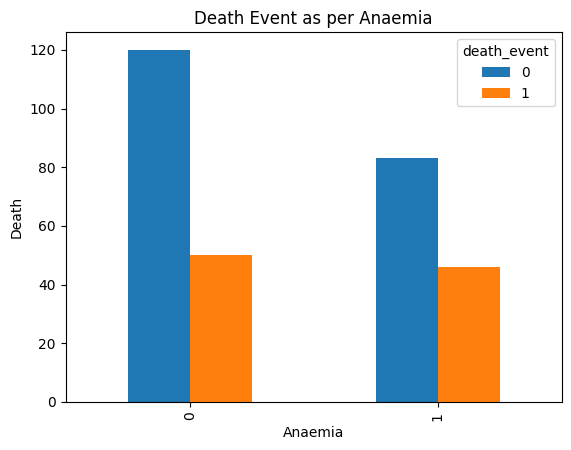

In [55]:
pd.crosstab(df.anaemia  ,df.death_event).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

In [56]:
#Smoking
ds = df['smoking'].value_counts().reset_index()
ds.columns = ['smoking', 'count']
fig = px.bar(ds, x='smoking', y="count", orientation='v', title='Count of Patients who Smoke', width=500)
fig.show()

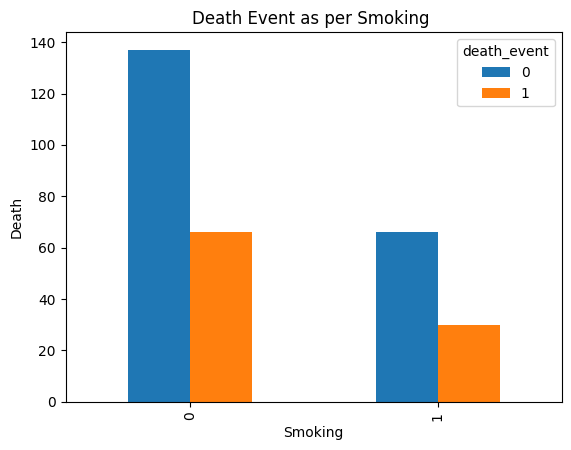

In [57]:
pd.crosstab(df.smoking ,df.death_event).plot(kind='bar')
plt.title('Death Event as per Smoking ')
plt.xlabel('Smoking')
plt.ylabel('Death')
plt.show()

In [58]:
print("Percentage of people who died and are smokers:",df["death_event"][df["smoking"] == 1].value_counts(normalize = True)[1]*100)

Percentage of people who died and are smokers: 31.25


In [59]:
print("Percentage of people who died and are not smokers:", df["death_event"][df["smoking"] == 0].value_counts(normalize = True)[1]*100)

Percentage of people who died and are not smokers: 32.51231527093596


In [60]:
#Blood Pressure
ds = df['high_blood_pressure'].value_counts().reset_index()
ds.columns = ['high_blood_pressure', 'count']
fig = px.bar(ds, x='high_blood_pressure', y="count", orientation='v', title='Count of Patients with high blood pressure', width=500)
fig.show()

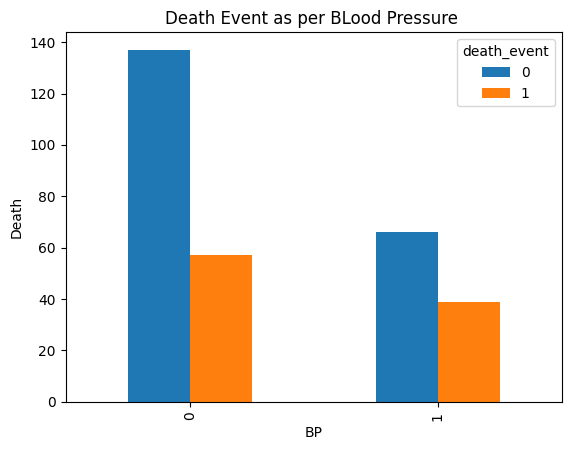

In [61]:
pd.crosstab(df.high_blood_pressure  ,df.death_event).plot(kind='bar')
plt.title('Death Event as per BLood Pressure ')
plt.xlabel('BP')
plt.ylabel('Death')
plt.show()

In [62]:
#Diabetes
ds = df['diabetes'].value_counts().reset_index()
ds.columns = ['diabetes', 'count']
fig = px.bar(ds, x='diabetes', y="count", orientation='v', title='Count of Patients with diabetes', width=500)
fig.show()

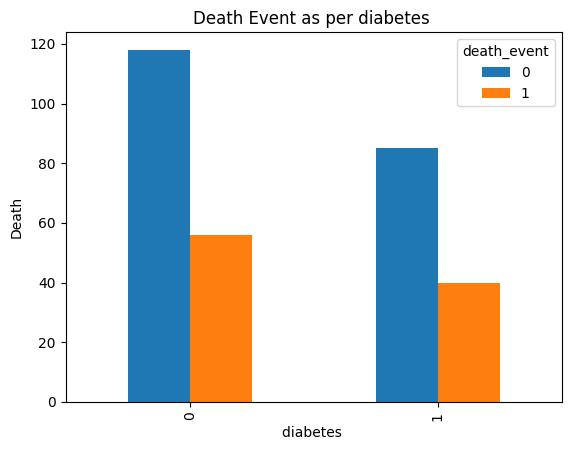

In [63]:
pd.crosstab(df.diabetes ,df.death_event).plot(kind='bar')
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

In [64]:
#Sex
ds = df['sex'].value_counts().reset_index()
ds.columns = ['sex', 'count']
fig = px.bar(ds, x='sex', y="count", orientation='v', title='Count of Patients according to sex', width=500)
fig.show()

In [65]:
ds = df['sex'].value_counts().reset_index()
ds.columns = ['sex', 'count']
fig = px.bar(ds, x='sex', y="count", orientation='v', title='Count of Patients according to sex', width=500)
fig.show()

In [66]:
print("Females:",df["death_event"][df["sex"] == 0].value_counts(normalize = True)[1]*100)

Females: 32.38095238095238


In [67]:
print("Males:",df["death_event"][df["sex"] == 1].value_counts(normalize = True)[1]*100)

Males: 31.958762886597935


In [68]:
#Age
g_30=list()
g_50=list()
g_70=list()
greater70 = list()
for i in df.age:
  if i<=30:
    g_30.append(1)
    g_50.append(0)
    g_70.append(0)
    greater70.append(0)

  elif i>30 and i<=50:
    g_30.append(0)
    g_50.append(1)
    g_70.append(0)
    greater70.append(0)

  elif i>50 and i<=70:
    g_30.append(0)
    g_50.append(0)
    g_70.append(1)
    greater70.append(0)

  elif i>70:
    g_30.append(0)
    g_50.append(0)
    g_70.append(0)
    greater70.append(1)

In [69]:
df['age_till_30'] = g_30
df['age_bet_30_50'] = g_50
df['age_bet_50_70'] = g_70
df['age_gret_70'] = greater70

In [70]:
#Age below 30
df.age_till_30.value_counts()

0    299
Name: age_till_30, dtype: int64

In [71]:
ds = df['age_till_30'].value_counts().reset_index()
ds.columns = ['age_till_30', 'count']
fig = px.bar(ds, x='age_till_30', y="count", orientation='v', title='Count of Patients with age till 30', width=500)
fig.show()

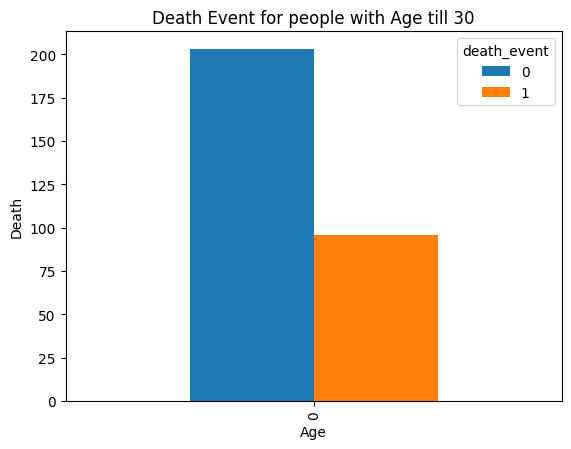

In [72]:
pd.crosstab(df.age_till_30 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age till 30')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

In [73]:
#Age between 30 and 50
df.age_bet_30_50.value_counts()

0    225
1     74
Name: age_bet_30_50, dtype: int64

In [74]:
ds = df['age_bet_30_50'].value_counts().reset_index()
ds.columns = ['age_bet_30_50', 'count']
fig = px.bar(ds, x='age_bet_30_50', y="count", orientation='v', title='Count of Patients with age between 30 and 50', width=500)
fig.show()

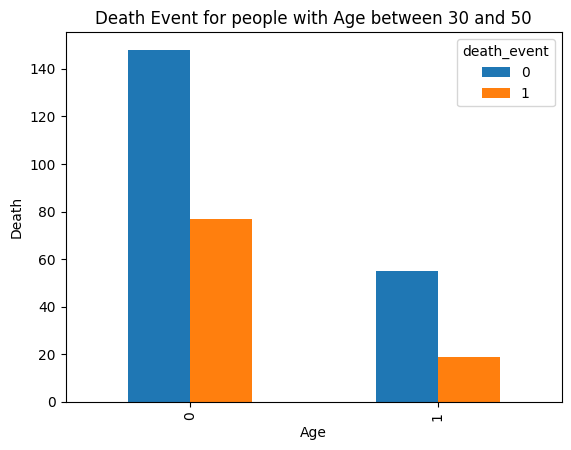

In [75]:
pd.crosstab(df.age_bet_30_50 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age between 30 and 50')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

In [76]:
print("Mortlity Rate:", df["death_event"][df["age_bet_30_50"] == 1].value_counts(normalize = True)[1]*100)

Mortlity Rate: 25.675675675675674


In [77]:
#Age between 50 and 70
df.age_bet_50_70.value_counts()

1    173
0    126
Name: age_bet_50_70, dtype: int64

In [78]:
ds = df['age_bet_50_70'].value_counts().reset_index()
ds.columns = ['age_bet_50_70', 'count']
fig = px.bar(ds, x='age_bet_50_70', y="count", orientation='v', title='Count of Patients with age between 50 and 70', width=500)
fig.show()

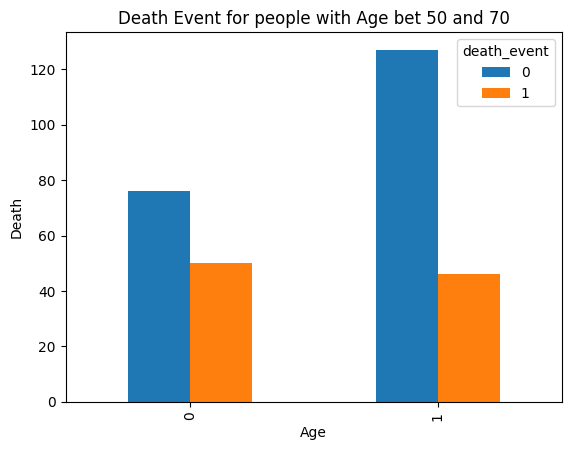

In [79]:
pd.crosstab(df.age_bet_50_70 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age bet 50 and 70')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

In [80]:
print("Mortality Rate:",df["death_event"][df["age_bet_50_70"] == 1].value_counts(normalize = True)[1]*100)

Mortality Rate: 26.589595375722542


In [81]:
#Age greater than 70
df.age_gret_70.value_counts()

0    247
1     52
Name: age_gret_70, dtype: int64

In [82]:
ds = df['age_gret_70'].value_counts().reset_index()
ds.columns = ['age_gret_70', 'count']
fig = px.bar(ds, x='age_gret_70', y="count", orientation='v', title='Count of Patients with age greater than 70', width=500)
fig.show()

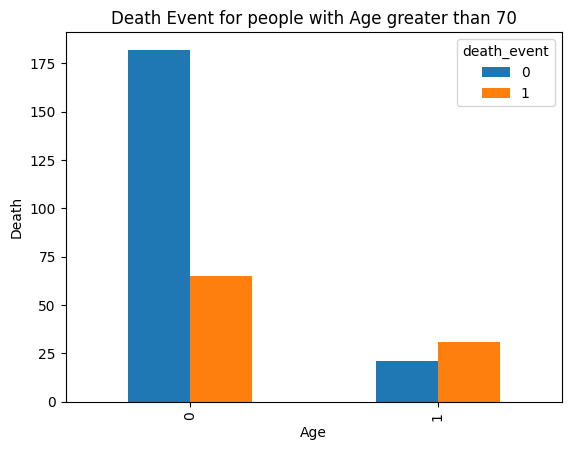

In [83]:
pd.crosstab(df.age_gret_70 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age greater than 70')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

In [84]:
print("Mortality Rate:", df["death_event"][df["age_gret_70"] == 1].value_counts(normalize = True)[1]*100)

Mortality Rate: 59.61538461538461


In [85]:
#Long Form Graphs
fig = px.bar(df, x="diabetes", y="age", color="death_event", title="Long-Form Input")
fig.show()

In [86]:
fig = px.bar(df, x="sex", y="age", color="death_event", title="Long-Form Input")
fig.show()

In [87]:
fig = px.bar(df, x="smoking", y="age", color="death_event", title="Long-Form Input")
fig.show()

In [88]:
#Box Plots
import plotly.express as px
fig = px.violin(df, y="age", x="sex", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis of Age and Sex on Death Event")
fig.show()

In [89]:
import plotly.express as px
fig = px.violin(df, y="age", x="smoking", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis of Age and Smoking on Death Event")
fig.show()

In [90]:
#CatBoost Model Training
X = df.drop(columns=('death_event'),axis=1)
y = df.death_event

In [91]:
scaler = MinMaxScaler(feature_range=(0,100))
X['platelets'] = scaler.fit_transform(X[['platelets']])
X['cpk'] = scaler.fit_transform(X[['cpk']])
X.head()

,age,anaemia,cpk,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,age_till_30,age_bet_30_50,age_bet_50_70,age_gret_70
0,75.0,0,7.131921,0,20,1,29.082313,1.9,130,1,0,4,0,0,0,1
1,55.0,0,100.000000,0,38,0,28.883262,1.1,136,1,0,6,0,0,1,0
2,65.0,0,1.569278,0,20,0,16.595951,1.3,129,1,1,7,0,0,1,0
3,50.0,1,1.122735,0,20,0,22.414838,1.9,137,1,0,7,0,1,0,0
4,65.0,1,1.747895,1,20,0,36.598376,2.7,116,0,0,8,0,0,1,0


In [92]:
#Splitting the data in train and test set
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25, random_state=1 )

In [93]:
#Fitting the model
y.value_counts()

0    203
1     96
Name: death_event, dtype: int64

In [94]:
#With Class Weights
class_weight = {0:1 , 1:2}
model = CatBoostClassifier(n_estimators=400  ,  depth = 4 , class_weights = class_weight)
model.fit(X_train , y_train)

Learning rate set to 0.012601
0:	learn: 0.6836493	total: 10.9ms	remaining: 4.35s
1:	learn: 0.6777521	total: 13.9ms	remaining: 2.77s
2:	learn: 0.6697273	total: 16.5ms	remaining: 2.19s
3:	learn: 0.6638958	total: 18.7ms	remaining: 1.85s
4:	learn: 0.6559299	total: 21.2ms	remaining: 1.68s
5:	learn: 0.6479998	total: 23.7ms	remaining: 1.55s
6:	learn: 0.6421828	total: 26.1ms	remaining: 1.47s
7:	learn: 0.6359627	total: 28.8ms	remaining: 1.41s
8:	learn: 0.6300614	total: 31.8ms	remaining: 1.38s
9:	learn: 0.6242975	total: 34.3ms	remaining: 1.34s
10:	learn: 0.6175718	total: 35.6ms	remaining: 1.26s
11:	learn: 0.6113117	total: 40.9ms	remaining: 1.32s
12:	learn: 0.6045185	total: 41.8ms	remaining: 1.25s
13:	learn: 0.5975860	total: 44.3ms	remaining: 1.22s
14:	learn: 0.5927453	total: 45.2ms	remaining: 1.16s
15:	learn: 0.5863724	total: 46ms	remaining: 1.1s
16:	learn: 0.5800607	total: 46.9ms	remaining: 1.05s
17:	learn: 0.5748893	total: 47.8ms	remaining: 1.01s
18:	learn: 0.5686267	total: 49.2ms	remaining: 9

In [95]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, model.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))

Training Accuracy: 0.955
Testing Accuracy: 0.867


In [96]:
#Without Class Weights
model = CatBoostClassifier(n_estimators=400  ,  depth = 4)
model.fit(X_train , y_train)

Learning rate set to 0.012601
0:	learn: 0.6864243	total: 1.33ms	remaining: 531ms
1:	learn: 0.6793081	total: 4.62ms	remaining: 919ms
2:	learn: 0.6700857	total: 6.42ms	remaining: 849ms
3:	learn: 0.6633572	total: 8.42ms	remaining: 834ms
4:	learn: 0.6541715	total: 10.4ms	remaining: 825ms
5:	learn: 0.6436086	total: 12.5ms	remaining: 818ms
6:	learn: 0.6369023	total: 14.6ms	remaining: 820ms
7:	learn: 0.6299859	total: 17ms	remaining: 834ms
8:	learn: 0.6233270	total: 19ms	remaining: 825ms
9:	learn: 0.6167242	total: 21ms	remaining: 818ms
10:	learn: 0.6103753	total: 23.6ms	remaining: 835ms
11:	learn: 0.6045073	total: 25.4ms	remaining: 821ms
12:	learn: 0.5969508	total: 27.4ms	remaining: 815ms
13:	learn: 0.5888924	total: 29.4ms	remaining: 811ms
14:	learn: 0.5834167	total: 32.2ms	remaining: 828ms
15:	learn: 0.5763249	total: 33.7ms	remaining: 809ms
16:	learn: 0.5700638	total: 35.5ms	remaining: 801ms
17:	learn: 0.5642062	total: 37.6ms	remaining: 798ms
18:	learn: 0.5593256	total: 39.5ms	remaining: 792m

In [97]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, model.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))

Training Accuracy: 0.942
Testing Accuracy: 0.933


In [99]:
#Classification Report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        55
           1       1.00      0.75      0.86        20

    accuracy                           0.93        75
   macro avg       0.96      0.88      0.91        75
weighted avg       0.94      0.93      0.93        75



In [100]:
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)
print('True Positive' , cm[0,0])
print('False Positive' , cm[0,1])
print('True Negative' , cm[1,1])
print('False Negative' , cm[1,0])

[[55  0]
 [ 5 15]]
True Positive 55
False Positive 0
True Negative 15
False Negative 5


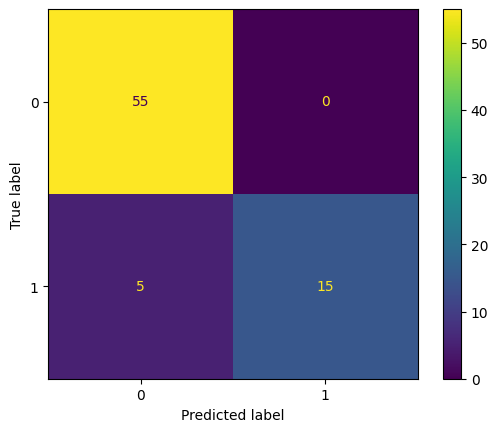

In [108]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()
